In [1]:
import numpy as np
import os
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import sklearn
from sklearn.linear_model import LinearRegression
#import sklearn.gaussian_process as gp
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

In [2]:
climate_models = ["CCSM4", "GFDL_CM3", "HadGEM2_ES", "MIROC5", "MPI_ESM_MR"]
years = ["2005", "2040", "2099"]
variants = ["CRH", "SD"]

all_storm_tracks = []

num_storms = 0

for climate_model in climate_models:
    for year in years:
        for variant in variants:
            dir_path = "./storms/%s_%s_%s/" % (climate_model, year, variant)
            
            for file_name in os.listdir(dir_path):
                if num_storms <= 117000:
                    a = np.array(np.genfromtxt(dir_path+file_name, skip_header = 3,usecols = [1,2], missing_values = -1.0))
                    all_storm_tracks.append(a)
                    num_storms += 1
                


In [73]:
print(len(all_storm_tracks))

56717


In [203]:
climate_models = ["CCSM4", "GFDL_CM3", "HadGEM2_ES", "MIROC5", "MPI_ESM_MR"]
years = ["2005", "2040", "2099"]
variants = ["CRH", "SD"]

one_from_each = []

for climate_model in climate_models:
    for year in years:
        for variant in variants:
            dir_path = "./storms/%s_%s_%s/" % (climate_model, year, variant)   
            for i in range(1):
                if True:
                    a = np.array(np.genfromtxt(dir_path+str(i).zfill(5)+".storm", skip_header = 3,usecols = [0,1,2], missing_values = -1.0))
                    one_from_each.append(a)
                


In [4]:
print(len(all_storm_tracks))

157272


In [5]:
slen = []
for storm in all_storm_tracks:
    slen.append(len(storm))

In [6]:
print(min(slen))
print(max(slen))

3
125


In [14]:
#randindices = np.random.randint(len(all_storm_tracks),size = 1000)

In [120]:
print(randindices[830])

116900


In [130]:
print(np.argmin(randindices[800:]))

81


In [143]:
np.argsort(randindices[800:])

array([ 81,  54,   8, 102, 183, 111, 198, 115, 182, 189, 195, 141,  25,
       129, 117,  59, 114,  31, 164, 130,  42, 185, 127, 197,  88,   0,
        84, 121, 174, 135,  98,   9,  28, 199,  90,  85,  58, 192,  56,
       145,  99, 101, 140,  57,  52, 139, 120,  39,  45, 159,  24, 188,
        43,  55,  94,  76, 158,  34, 143,   4,  12, 171, 179,  27, 131,
       150,  51,  53, 128,  17, 142,   5,  20, 119, 163, 149, 112, 124,
       116, 113, 125,  29,  49, 107,  83,   7, 173,  70,  15,  89, 148,
       146,  80,  40,  68,  44,  87,  77,  32,  18, 193,  72, 138, 157,
        75,  41, 177,  61,   1, 178,  48, 190,  19,  79,  92,  13,  35,
        22, 175,  14,  64, 133, 165,  96,  47,  95, 136,  71, 104,  26,
        46, 144,   6,  21, 154, 155,  91, 180,  37, 109,  82,  36, 134,
        10,  30, 147, 170,  86, 187,  23, 100, 132,  16,  50,  78, 181,
         3, 162, 151,   2, 196,  38, 106,  69,  33,  97, 126,  93,  62,
        11, 186, 167, 168, 123, 169, 108,  73, 194, 184, 105, 11

In [196]:
print(randindices[830])

116900


In [173]:
k = 3

In [174]:
X = []
long = []
lat = []
for s_index in randindices:
    storm = all_storm_tracks[s_index]
    #for i in range(len(storm)-k):
    for i in range(1):
        i = np.random.randint(len(storm)-k)
        #X_i = np.concatenate((storm[i:i+k,0],storm[i:i+k,1],[storm[i+k,0]**2,storm[i+k,1]**2]))
        X_i = np.concatenate((storm[i:i+k,0],storm[i:i+k,1]))
        X.append(X_i)
        long.append(storm[i+k,0])
        lat.append(storm[i+k,1])

X = np.array(X)
long = np.array(long)
lat = np.array(lat)

In [175]:
print(X.shape)
print(long.shape)
print(lat.shape)

(1000, 6)
(1000,)
(1000,)


In [176]:
split = int(0.8*len(X))
reg_long = LinearRegression().fit(X[:split], long[:split])
reg_lat  = LinearRegression().fit(X[:split], lat[:split])
print(reg_long.score(X[split:], long[split:]))
print(reg_lat.score(X[split:], lat[split:]))
#print(reg_long.coef_)

0.999902682568288
0.9998635155566458


In [177]:
#kernel1 = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
#kernelRBF = 1 * RBF(length_scale=100.0)
kernel1 = DotProduct() + WhiteKernel()
gpr_long = GaussianProcessRegressor(kernel=kernel1, random_state = 0)
#gpr_long = GaussianProcessRegressor(kernel = kernelRBF)
gpr_long.fit(X[:split], long[:split])
print(gpr_long.score(X[:split], long[:split]))
print(gpr_long.score(X[split:], long[split:]))
kernel2 = DotProduct() + WhiteKernel()
gpr_lat = GaussianProcessRegressor(kernel=kernel2, random_state = 0)
#gpr_lat = GaussianProcessRegressor(kernel = kernelRBF)
gpr_lat.fit(X[:split], lat[:split])
print(gpr_lat.score(X[:split], lat[:split]))
print(gpr_lat.score(X[split:], lat[split:]))

0.999890144342753
0.9999026235167188
0.9998774417799658
0.9998634734513123


In [254]:
s_split = 800
rand_index = np.random.randint(s_split,1000)
rand_index = 830
p = 5

print(randindices[rand_index])
test_storm = all_storm_tracks[randindices[rand_index]]
print(len(test_storm))

index = 9638
print(index)
test_storm = all_storm_tracks[index]
print(len(test_storm))
p = 22

116900
27
9638
30


In [255]:
lons_pred = test_storm[:p,0].copy()
lats_pred = test_storm[:p,1].copy()
for i in range(len(test_storm)-p):
    #x = np.concatenate((lons_pred[-k:],lats_pred[-k:],[lons_pred[-1]**2,lats_pred[-1]**2]))
    x = np.concatenate((lons_pred[-k:],lats_pred[-k:]))
    lons_pred = np.append(lons_pred,reg_long.predict(x.reshape(1, -1)))
    lats_pred = np.append(lats_pred,reg_lat.predict(x.reshape(1, -1)))

In [256]:
lons_gpr = test_storm[:p,0].copy()
lats_gpr = test_storm[:p,1].copy()
sigma_lon = []
sigma_lat = []
for i in range(len(test_storm)-p):
    #x = np.concatenate((lons_gpr[-k:],lats_gpr[-k:],[lons_gpr[-1]**2,lats_gpr[-1]**2]))
    x = np.concatenate((lons_gpr[-k:],lats_gpr[-k:]))
    
    lons_next, sigma = gpr_long.predict(x.reshape(1, -1),return_std=True)
    lons_gpr = np.append(lons_gpr,lons_next)
    sigma_lon.append(sigma)
    
    lats_next, sigma = gpr_lat.predict(x.reshape(1, -1),return_std=True)
    lats_gpr = np.append(lats_gpr,lats_next)
    sigma_lat.append(sigma)

C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [257]:
print(sigma_lon)
print(sigma_lat)

[array([0.22745063]), array([0.20261742]), array([0.19467554]), array([0.17161575]), array([0.14300632]), array([0.24117836]), array([0.16028115]), array([0.20820911])]
[array([0.26070737]), array([0.17573669]), array([0.2115477]), array([0.22065449]), array([0.15584417]), array([0.]), array([0.27841636]), array([0.09275247])]


In [258]:
print(lons_pred)
print(lats_pred)

[302.93       302.086034   301.125768   300.039205   299.154169
 298.34211    297.485465   296.558297   295.577764   294.586276
 293.503428   292.590375   291.562864   290.381391   289.473745
 288.598722   287.933405   287.336812   286.884688   286.425913
 285.90056    285.643624   285.66623308 285.97268876 286.56094829
 287.42323179 288.54671865 289.9143001  291.50535877 293.29654947]
[27.38       27.5548875  27.7620042  27.9909686  28.1928587  28.3649819
 28.5369488  28.7450235  29.0388204  29.4521554  29.9613047  30.5484473
 31.2319172  31.998112   32.8472671  33.7724891  34.8188975  35.8354564
 36.6861899  37.3702477  38.0215747  38.6539393  39.27810158 39.90153473
 40.52877643 41.16178885 41.80031746 42.44224146 43.08391034 43.72046256]


In [259]:
print(len(lons_gpr))
print(len(lats_gpr))

30
30


In [260]:
def gpr_project(lons,lats, n_next = 1):
    lons_gpr = lons.copy()
    lats_gpr = lats.copy()
    for i in range(n_next):
        x = np.concatenate((lons_gpr[-k:],lats_gpr[-k:]))
        
        lons_next= gpr_long.predict(x.reshape(1, -1))
        lons_gpr = np.append(lons_gpr,lons_next)

        lats_next= gpr_lat.predict(x.reshape(1, -1))
        lats_gpr = np.append(lats_gpr,lats_next)
    return lons_gpr, lats_gpr

    
def gpr_project_sample(lons,lats, n_next = 1, random_state = 0):
    lons_gpr = lons.copy()
    lats_gpr = lats.copy()
    for i in range(n_next):
        x = np.concatenate((lons_gpr[-k:],lats_gpr[-k:]))
        
        lons_next= gpr_long.sample_y(x.reshape(1, -1),random_state=random_state)
        lons_gpr = np.append(lons_gpr,lons_next)

        lats_next= gpr_lat.sample_y(x.reshape(1, -1),random_state=random_state)
        lats_gpr = np.append(lats_gpr,lats_next)
    return lons_gpr, lats_gpr

In [261]:
#lons_rand, lats_rand = gpr_project(test_storm[:p,0],test_storm[:p,1],n_next = 22)
#print(lons_rand)
#print(lons_gpr)
#print(lons_rand-lons_gpr)

C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


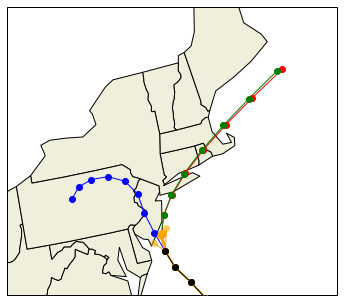

In [263]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-80, -66.5, 38, 46], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',
                        category='cultural', name=shapename)
def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    return {'facecolor': facecolor, 'edgecolor': 'black'}
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)


for i in range(1):
    #lons = all_storm_tracks[randindices[split]][:10,0]-360
    #lats = all_storm_tracks[randindices[split]][:10,1]
    track = sgeom.LineString(zip(lons_pred-360.0, lats_pred))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'r')
    
ax.scatter(lons_pred-360.0,lats_pred,transform=ccrs.PlateCarree(), color = 'r', zorder = 3)

for i in range(1):
    #lons = all_storm_tracks[randindices[split]][:10,0]-360
    #lats = all_storm_tracks[randindices[split]][:10,1]
    track = sgeom.LineString(zip(lons_gpr-360.0, lats_gpr))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'g')
    
ax.scatter(lons_gpr-360.0,lats_gpr,transform=ccrs.PlateCarree(), color = 'g', zorder = 3)
    
for i in range(1):
    lons = test_storm[:,0]-360
    lats = test_storm[:,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'b')

ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'b', zorder = 3)

for i in np.random.randint(100,size = 10):
    lons_rand, lats_rand = gpr_project_sample(test_storm[:p,0],test_storm[:p,1],n_next = 1, random_state = i)
    track = sgeom.LineString(zip(lons_rand-360.0, lats_rand))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'orange')
    ax.scatter(lons_rand-360.0,lats_rand,transform=ccrs.PlateCarree(), color = 'orange', alpha = 0.5, zorder = 3)
    
for i in range(1):
    lons = test_storm[:p,0]-360
    lats = test_storm[:p,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'k')

ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'k', zorder = 3)

#track = sgeom.LineString(zip(sandy_orig[:,0], sandy_orig[:,1]))  
#ax.add_geometries([track], ccrs.PlateCarree(),
#                          facecolor='none', edgecolor='k')

plt.show()

In [265]:
print(lons_gpr)
print(lats_gpr)
np.array([lons_gpr,lats_gpr]).transpose()

[302.93       302.086034   301.125768   300.039205   299.154169
 298.34211    297.485465   296.558297   295.577764   294.586276
 293.503428   292.590375   291.562864   290.381391   289.473745
 288.598722   287.933405   287.336812   286.884688   286.425913
 285.90056    285.643624   285.66340788 285.9615263  286.53354581
 287.36971893 288.45577536 289.77373786 291.30273477 293.01978558]
[27.38       27.5548875  27.7620042  27.9909686  28.1928587  28.3649819
 28.5369488  28.7450235  29.0388204  29.4521554  29.9613047  30.5484473
 31.2319172  31.998112   32.8472671  33.7724891  34.8188975  35.8354564
 36.6861899  37.3702477  38.0215747  38.6539393  39.27797035 39.90104294
 40.52765037 41.15977342 41.79724006 42.43807063 43.07880512 43.71481007]


array([[302.93      ,  27.38      ],
       [302.086034  ,  27.5548875 ],
       [301.125768  ,  27.7620042 ],
       [300.039205  ,  27.9909686 ],
       [299.154169  ,  28.1928587 ],
       [298.34211   ,  28.3649819 ],
       [297.485465  ,  28.5369488 ],
       [296.558297  ,  28.7450235 ],
       [295.577764  ,  29.0388204 ],
       [294.586276  ,  29.4521554 ],
       [293.503428  ,  29.9613047 ],
       [292.590375  ,  30.5484473 ],
       [291.562864  ,  31.2319172 ],
       [290.381391  ,  31.998112  ],
       [289.473745  ,  32.8472671 ],
       [288.598722  ,  33.7724891 ],
       [287.933405  ,  34.8188975 ],
       [287.336812  ,  35.8354564 ],
       [286.884688  ,  36.6861899 ],
       [286.425913  ,  37.3702477 ],
       [285.90056   ,  38.0215747 ],
       [285.643624  ,  38.6539393 ],
       [285.66340788,  39.27797035],
       [285.9615263 ,  39.90104294],
       [286.53354581,  40.52765037],
       [287.36971893,  41.15977342],
       [288.45577536,  41.79724006],
 

# number 1

C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


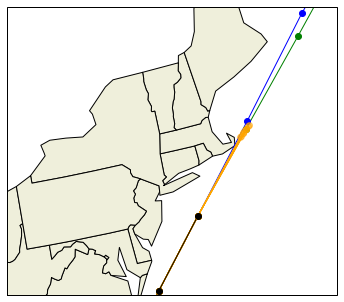

In [279]:
test_storm = all_storm_tracks[1]
p = 14

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-80, -66.5, 38, 46], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',
                        category='cultural', name=shapename)
def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    return {'facecolor': facecolor, 'edgecolor': 'black'}
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)



for i in range(1):
    lons_gpr, lats_gpr = gpr_project(test_storm[:p,0],test_storm[:p,1], n_next = len(test_storm)-p)
    track = sgeom.LineString(zip(lons_gpr-360.0, lats_gpr))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'g')
    
ax.scatter(lons_gpr-360.0,lats_gpr,transform=ccrs.PlateCarree(), color = 'g', zorder = 3)
    
for i in range(1):
    lons = test_storm[:,0]-360
    lats = test_storm[:,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'b')

ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'b', zorder = 3)

for i in np.random.randint(100,size = 10):
    lons_rand, lats_rand = gpr_project_sample(test_storm[:p,0],test_storm[:p,1],n_next = 1, random_state = i)
    track = sgeom.LineString(zip(lons_rand-360.0, lats_rand))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'orange')
    ax.scatter(lons_rand-360.0,lats_rand,transform=ccrs.PlateCarree(), color = 'orange', alpha = 0.5, zorder = 3)
    
for i in range(1):
    lons = test_storm[:p,0]-360
    lats = test_storm[:p,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'k')

ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'k', zorder = 3)

#track = sgeom.LineString(zip(sandy_orig[:,0], sandy_orig[:,1]))  
#ax.add_geometries([track], ccrs.PlateCarree(),
#                          facecolor='none', edgecolor='k')

plt.show()

# number 116900

C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


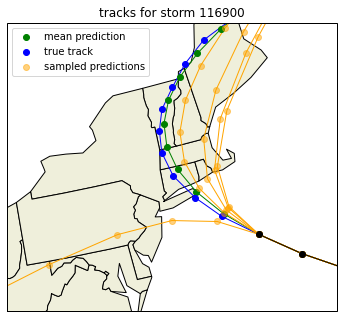

In [301]:
test_storm = all_storm_tracks[116900]
p = 4
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-80, -66.5, 38, 46], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',
                        category='cultural', name=shapename)
def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    return {'facecolor': facecolor, 'edgecolor': 'black'}
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)


#for i in range(1):
    #lons = all_storm_tracks[randindices[split]][:10,0]-360
    #lats = all_storm_tracks[randindices[split]][:10,1]
    #track = sgeom.LineString(zip(lons_pred-360.0, lats_pred))
#    ax.add_geometries([track], ccrs.PlateCarree(),
#                          facecolor='none',edgecolor = 'r')
#    
#ax.scatter(lons_pred-360.0,lats_pred,transform=ccrs.PlateCarree(), color = 'r', zorder = 3)

for i in range(1):
    lons, lats = gpr_project(test_storm[:p,0],test_storm[:p,1],n_next = len(test_storm)-p)
    #lons = all_storm_tracks[randindices[split]][:10,0]-360
    #lats = all_storm_tracks[randindices[split]][:10,1]
    track = sgeom.LineString(zip(lons-360.0, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'g')
    
ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'g', zorder = 3,label = 'mean prediction')
    
for i in range(1):
    lons = test_storm[:,0]-360
    lats = test_storm[:,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'b')

ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'b', zorder = 3, label = 'true track')

for count, i in enumerate(np.random.randint(100,size = 5)):
    lons_rand, lats_rand = gpr_project_sample(test_storm[:p,0],test_storm[:p,1],n_next = len(test_storm)-p, random_state = i)
    track = sgeom.LineString(zip(lons_rand-360.0, lats_rand))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'orange')
    if count == 0:
        ax.scatter(lons_rand-360.0,lats_rand,transform=ccrs.PlateCarree(), color = 'orange', alpha = 0.5, zorder = 3, label = 'sampled predictions')
    else:
        ax.scatter(lons_rand-360.0,lats_rand,transform=ccrs.PlateCarree(), color = 'orange', alpha = 0.5, zorder = 3)
for i in range(1):
    lons = test_storm[:p,0]-360
    lats = test_storm[:p,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'k')

ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'k', zorder = 3)

#track = sgeom.LineString(zip(sandy_orig[:,0], sandy_orig[:,1]))  
#ax.add_geometries([track], ccrs.PlateCarree(),
#                          facecolor='none', edgecolor='k')

plt.legend()
plt.title("tracks for storm 116900")
plt.show()

# 9638

C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


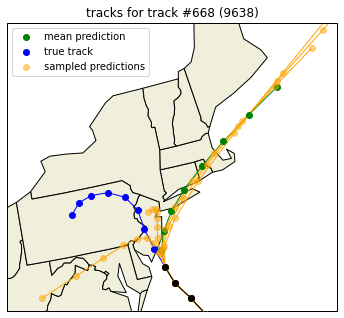

In [306]:
test_storm = all_storm_tracks[9638]
p = 22
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-80, -66.5, 38, 46], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',
                        category='cultural', name=shapename)
def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    return {'facecolor': facecolor, 'edgecolor': 'black'}
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)


#for i in range(1):
    #lons = all_storm_tracks[randindices[split]][:10,0]-360
    #lats = all_storm_tracks[randindices[split]][:10,1]
    #track = sgeom.LineString(zip(lons_pred-360.0, lats_pred))
#    ax.add_geometries([track], ccrs.PlateCarree(),
#                          facecolor='none',edgecolor = 'r')
#    
#ax.scatter(lons_pred-360.0,lats_pred,transform=ccrs.PlateCarree(), color = 'r', zorder = 3)

for i in range(1):
    lons, lats = gpr_project(test_storm[:p,0],test_storm[:p,1],n_next = len(test_storm)-p)
    #lons = all_storm_tracks[randindices[split]][:10,0]-360
    #lats = all_storm_tracks[randindices[split]][:10,1]
    track = sgeom.LineString(zip(lons-360.0, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'g')
    
ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'g', zorder = 3,label = 'mean prediction')
    
for i in range(1):
    lons = test_storm[:,0]-360
    lats = test_storm[:,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'b')

ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'b', zorder = 3, label = 'true track')

for count, i in enumerate(np.random.randint(100,size = 5)):
    lons_rand, lats_rand = gpr_project_sample(test_storm[:p,0],test_storm[:p,1],n_next = len(test_storm)-p, random_state = i)
    track = sgeom.LineString(zip(lons_rand-360.0, lats_rand))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'orange')
    if count == 0:
        ax.scatter(lons_rand-360.0,lats_rand,transform=ccrs.PlateCarree(), color = 'orange', alpha = 0.5, zorder = 3, label = 'sampled predictions')
    else:
        ax.scatter(lons_rand-360.0,lats_rand,transform=ccrs.PlateCarree(), color = 'orange', alpha = 0.5, zorder = 3)
for i in range(1):
    lons = test_storm[:p,0]-360
    lats = test_storm[:p,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'k')

ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'k', zorder = 3)

#track = sgeom.LineString(zip(sandy_orig[:,0], sandy_orig[:,1]))  
#ax.add_geometries([track], ccrs.PlateCarree(),
#                          facecolor='none', edgecolor='k')

plt.legend()
plt.title("tracks for track #668 (9638)")
plt.show()

# ----------------------

C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


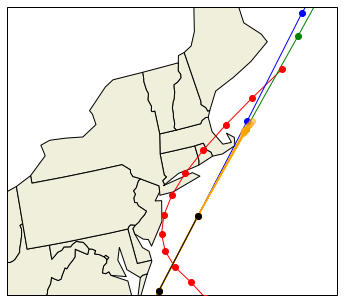

In [281]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-80, -66.5, 38, 46], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',
                        category='cultural', name=shapename)
def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    return {'facecolor': facecolor, 'edgecolor': 'black'}
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)


for i in range(1):
    #lons = all_storm_tracks[randindices[split]][:10,0]-360
    #lats = all_storm_tracks[randindices[split]][:10,1]
    track = sgeom.LineString(zip(lons_pred-360.0, lats_pred))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'r')
    
ax.scatter(lons_pred-360.0,lats_pred,transform=ccrs.PlateCarree(), color = 'r', zorder = 3)

for i in range(1):
    #lons = all_storm_tracks[randindices[split]][:10,0]-360
    #lats = all_storm_tracks[randindices[split]][:10,1]
    track = sgeom.LineString(zip(lons_gpr-360.0, lats_gpr))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'g')
    
ax.scatter(lons_gpr-360.0,lats_gpr,transform=ccrs.PlateCarree(), color = 'g', zorder = 3)
    
for i in range(1):
    lons = test_storm[:,0]-360
    lats = test_storm[:,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'b')

ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'b', zorder = 3)

for i in np.random.randint(100,size = 10):
    lons_rand, lats_rand = gpr_project_sample(test_storm[:p,0],test_storm[:p,1],n_next = 1, random_state = i)
    track = sgeom.LineString(zip(lons_rand-360.0, lats_rand))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'orange')
    ax.scatter(lons_rand-360.0,lats_rand,transform=ccrs.PlateCarree(), color = 'orange', alpha = 0.5, zorder = 3)
    
for i in range(1):
    lons = test_storm[:p,0]-360
    lats = test_storm[:p,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'k')

ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'k', zorder = 3)

#track = sgeom.LineString(zip(sandy_orig[:,0], sandy_orig[:,1]))  
#ax.add_geometries([track], ccrs.PlateCarree(),
#                          facecolor='none', edgecolor='k')

plt.show()

In [97]:
lons

array([-64.34    , -66.367432, -68.25278 , -69.860288, -71.265546])

In [26]:
np.concatenate(([1,2,2],[0]))

array([1, 2, 2, 0])

In [22]:
for i in range(-1):
    print('a')

(array([14910., 60171., 59504., 41176., 34506., 32745., 22718., 14803.,
         7723., 19547.]),
 array([  3. ,  15.2,  27.4,  39.6,  51.8,  64. ,  76.2,  88.4, 100.6,
        112.8, 125. ]),
 <BarContainer object of 10 artists>)

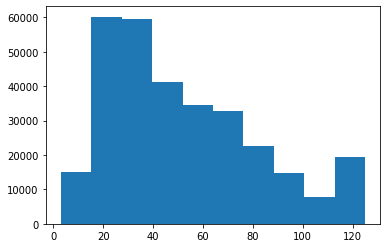

In [16]:
plt.hist(slen)

In [ ]:
climate_models = ["CCSM4", "GFDL_CM3", "HadGEM2_ES", "MIROC5", "MPI_ESM_MR"]
years = ["2005", "2040", "2099"]
variants = ["CRH", "SD"]

#all_storm_tracks = []

coordinates = []
zonal_wind = []
meridional_wind = []

num_coords = 0

for climate_model in climate_models:
    for year in years:
        for variant in variants:
            dir_path = "./storms/%s_%s_%s/" % (climate_model, year, variant)
            for file_name in os.listdir(dir_path):
                a = np.array(np.genfromtxt(dir_path+file_name, skip_header = 3,usecols = [1,2], missing_values = -1.0))
                for j in range(len(a)-1):
                    coordinates.append(a[j,:])
                    zonal_wind.append(a[j+1,0]-a[j,0])
                    meridional_wind.append(a[j+1,1]-a[j,1])
                    num_coords += 1
                    if num_coords%1000 == 0:
                        #print(num_coords)

In [6]:
coordinates = np.array(coordinates)
zonal_wind = np.array(zonal_wind)
meridional_wind = np.array(meridional_wind)

np.save("coordinates.npy",coordinates)
np.save("zonal_wind.npy",zonal_wind)
np.save("meridional_wind",meridional_wind)

In [7]:
print(num_coords)

15785482


(array([  7.,  21.,  83., 243., 305., 218.,  83.,  33.,   4.,   3.]),
 array([-2.8662064 , -2.11696979, -1.36773318, -0.61849657,  0.13074004,
         0.87997665,  1.62921326,  2.37844987,  3.12768648,  3.87692309,
         4.6261597 ]),
 <BarContainer object of 10 artists>)

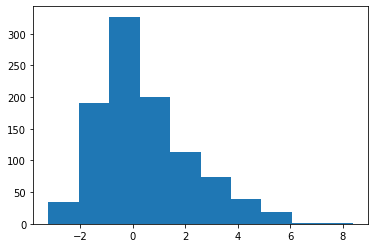

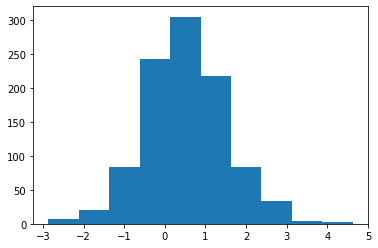

In [9]:
perm = np.random.permutation(15785482)
plt.figure()
plt.hist(zonal_wind[perm[:1000]])
plt.figure()
plt.hist(meridional_wind[perm[:1000]])

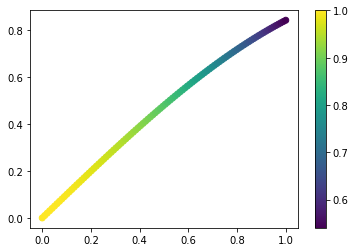

In [11]:
x = np.linspace(0,1.0,100)
y = np.sin(x)
cosx = np.cos(x)
plt.scatter(x,y,c = cosx)
plt.colorbar()
plt.show()

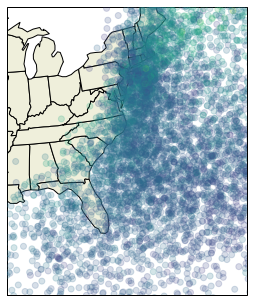

In [26]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-90, -66.5, 20, 46], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',
                        category='cultural', name=shapename)
def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    return {'facecolor': facecolor, 'edgecolor': 'black'}
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)

ax.scatter(coordinates[perm[:10000],0],coordinates[perm[:10000],1], 
           transform=ccrs.PlateCarree(), c = zonal_wind[perm[:10000]], zorder = 3,alpha = 0.2)
#plt.colorbar()
plt.show()

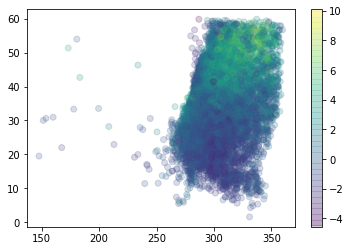

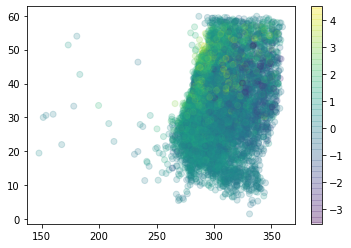

In [31]:
perm = np.random.permutation(15785482)
n = 10000
plt.figure()
plt.scatter(coordinates[perm[:n],0],coordinates[perm[:n],1], 
            c = zonal_wind[perm[:n]], zorder = 3,alpha = 0.2)
plt.colorbar()
plt.figure()
plt.scatter(coordinates[perm[:n],0],coordinates[perm[:n],1], 
            c = meridional_wind[perm[:n]], zorder = 3,alpha = 0.2)
plt.colorbar()
plt.show()

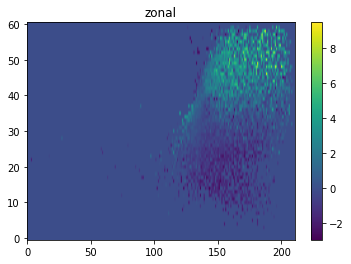

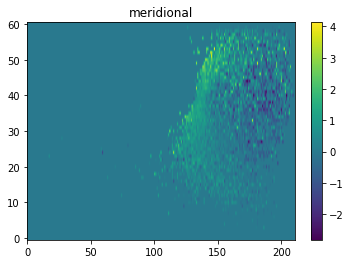

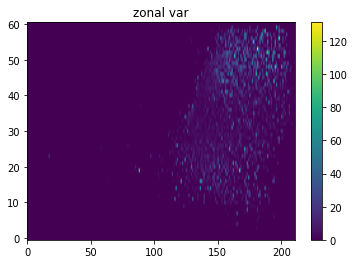

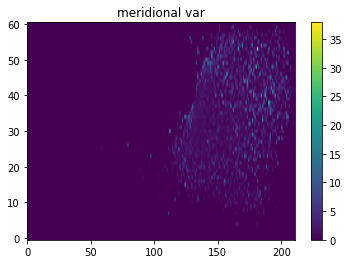

In [52]:
perm = np.random.permutation(15785482)
n = 10000

x_range = np.linspace(150,360,211)
y_range = np.linspace(0,60,61)
zonal_box = np.zeros((len(x_range),len(y_range)))
zonal_var_box = np.zeros((len(x_range),len(y_range)))
meridional_box = np.zeros((len(x_range),len(y_range)))
meridional_var_box = np.zeros((len(x_range),len(y_range)))
n_box = np.zeros((len(x_range),len(y_range)))

for k in range(n):
    i = int(coordinates[perm[k],0]-x_range[0])
    j = int(coordinates[perm[k],1]-y_range[0])
    zonal_box[i,j] = (zonal_box[i,j] * n_box[i,j] + zonal_wind[perm[k]])/ (n_box[i,j]+1)
    meridional_box[i,j] = (meridional_box[i,j] * n_box[i,j] + meridional_wind[perm[k]])/ (n_box[i,j]+1)
    n_box[i,j] += 1
    
#zonal_box = zonal_box / n_box
#meridional_box = meridional_box / n_box

for k in range(n):
    i = int(coordinates[perm[k],0]-x_range[0])
    j = int(coordinates[perm[k],1]-y_range[0])
    zonal_var_box[i,j] += (zonal_wind[k]-zonal_box[i,j])**2
    meridional_var_box[i,j] += (meridional_wind[k]-meridional_box[i,j])**2

for i in range(len(x_range)):
    for j in range(len(y_range)):
        if n_box[i,j] > 1:
            zonal_var_box[i,j] = zonal_var_box[i,j]/(n_box[i,j]-1)
            meridional_var_box[i,j] = meridional_var_box[i,j]/(n_box[i,j]-1)
    
    
plt.figure()
plt.imshow(zonal_box.transpose(), aspect = 'auto', origin = 'lower')
plt.title('zonal')
plt.colorbar()
plt.figure()
plt.imshow(meridional_box.transpose(), aspect = 'auto', origin = 'lower')
plt.title('meridional')
plt.colorbar()
plt.figure()
plt.imshow(zonal_var_box.transpose(), aspect = 'auto', origin = 'lower')
plt.title('zonal var')
plt.colorbar()
plt.figure()
plt.imshow(meridional_var_box.transpose(), aspect = 'auto', origin = 'lower')
plt.title('meridional var')
plt.colorbar()

plt.show()

#for i, x in enumerate(x_range):
#    for j, y in enumerate(y_range):
#        for k in range

In [53]:
nyc_box = (int(360-74.0060)-150,int(40.7128))
print(nyc_box)
print(zonal_box[nyc_box])
print(meridional_box[nyc_box])
print(zonal_var_box[nyc_box])
print(meridional_var_box[nyc_box])

(135, 40)
0.5143777692307787
0.9792572153846165
3.1498252515992164
0.9756683116673122


In [54]:
nyc_box = (140,30)
print(zonal_box[nyc_box])
print(meridional_box[nyc_box])
print(zonal_var_box[nyc_box])
print(meridional_var_box[nyc_box])

0.14996300000001384
0.05686207500000062
2.025371077844713
1.880288302250636


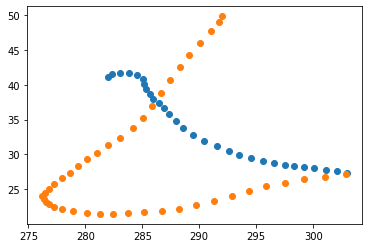

In [70]:
s_id = 9638
storm = all_storm_tracks[s_id]
plt.scatter(storm[:,0],storm[:,1])
s_id = 9630
storm = all_storm_tracks[s_id]
plt.scatter(storm[:,0],storm[:,1])
#plt.scatter(storm[1:,0],storm[1:,1])

In [4]:
# regression o

training_indices = np.random.permutation(num_storms)

k = 4
X = []
long = []
lat = []
for s_index in training_indices[:1000]:
    storm = all_storm_tracks[s_index]
    #for i in range(len(storm)-k):
    for i in range(1):
        i = np.random.randint(len(storm)-k)
        #X_i = np.concatenate((storm[i:i+k,0],storm[i:i+k,1],[storm[i+k,0]**2,storm[i+k,1]**2]))
        X_i = np.concatenate((storm[i:i+k,0],storm[i:i+k,1]))
        X.append(X_i)
        long.append(storm[i+k,0])
        lat.append(storm[i+k,1])

X = np.array(X)
long = np.array(long)
lat = np.array(lat)
split = int(0.8*len(X))
#kernel1 = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
#kernelRBF = 1 * RBF(length_scale=100.0)
kernel1 = DotProduct() + WhiteKernel()
gpr_long = GaussianProcessRegressor(kernel=kernel1, random_state = 0)
#gpr_long = GaussianProcessRegressor(kernel = kernelRBF)
gpr_long.fit(X[:split], long[:split])
print(gpr_long.score(X[:split], long[:split]))
print(gpr_long.score(X[split:], long[split:]))
kernel2 = DotProduct() + WhiteKernel()
gpr_lat = GaussianProcessRegressor(kernel=kernel2, random_state = 0)
#gpr_lat = GaussianProcessRegressor(kernel = kernelRBF)
gpr_lat.fit(X[:split], lat[:split])
print(gpr_lat.score(X[:split], lat[:split]))
print(gpr_lat.score(X[split:], lat[split:]))

0.999891267696139
0.999898415318716
0.9998856202971319
0.9998995238109186


In [5]:
def gpr_project(lons,lats, n_next = 1):
    lons_gpr = lons.copy()
    lats_gpr = lats.copy()
    for i in range(n_next):
        x = np.concatenate((lons_gpr[-k:],lats_gpr[-k:]))
        
        lons_next= gpr_long.predict(x.reshape(1, -1))
        lons_gpr = np.append(lons_gpr,lons_next)

        lats_next= gpr_lat.predict(x.reshape(1, -1))
        lats_gpr = np.append(lats_gpr,lats_next)
    return lons_gpr, lats_gpr

    
def gpr_project_sample(lons,lats, n_next = 1, random_state = 0):
    lons_gpr = lons.copy()
    lats_gpr = lats.copy()
    for i in range(n_next):
        x = np.concatenate((lons_gpr[-k:],lats_gpr[-k:]))
        
        lons_next= gpr_long.sample_y(x.reshape(1, -1),random_state=random_state)
        lons_gpr = np.append(lons_gpr,lons_next)

        lats_next= gpr_lat.sample_y(x.reshape(1, -1),random_state=random_state)
        lats_gpr = np.append(lats_gpr,lats_next)
    return lons_gpr, lats_gpr

C:\Users\pdine\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


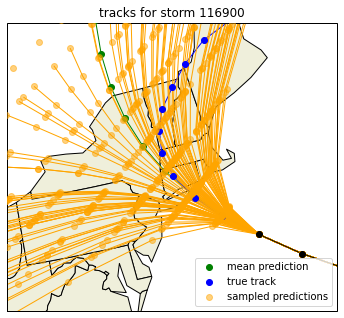

In [14]:
test_storm = all_storm_tracks[116900]
p = 4
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-80, -66.5, 38, 46], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',
                        category='cultural', name=shapename)
def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    return {'facecolor': facecolor, 'edgecolor': 'black'}
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)

generated_lons_list = []
generated_lats_list = []

#for i in range(1):
    #lons = all_storm_tracks[randindices[split]][:10,0]-360
    #lats = all_storm_tracks[randindices[split]][:10,1]
    #track = sgeom.LineString(zip(lons_pred-360.0, lats_pred))
#    ax.add_geometries([track], ccrs.PlateCarree(),
#                          facecolor='none',edgecolor = 'r')
#    
#ax.scatter(lons_pred-360.0,lats_pred,transform=ccrs.PlateCarree(), color = 'r', zorder = 3)

for i in range(1):
    lons, lats = gpr_project(test_storm[:p,0],test_storm[:p,1],n_next = len(test_storm)-p)
    #lons = all_storm_tracks[randindices[split]][:10,0]-360
    #lats = all_storm_tracks[randindices[split]][:10,1]
    track = sgeom.LineString(zip(lons-360.0, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'g')
    
ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'g', zorder = 3,label = 'mean prediction')
    
for i in range(1):
    lons = test_storm[:,0]-360
    lats = test_storm[:,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'b')

ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'b', zorder = 3, label = 'true track')

for count, i in enumerate(np.random.randint(1000,size = 100)):
    lons_rand, lats_rand = gpr_project_sample(test_storm[:p,0],test_storm[:p,1],n_next = len(test_storm)-p, random_state = i)
    generated_lons_list.append(lons_rand)
    generated_lats_list.append(lats_rand)
    track = sgeom.LineString(zip(lons_rand-360.0, lats_rand))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'orange')
    if count == 0:
        ax.scatter(lons_rand-360.0,lats_rand,transform=ccrs.PlateCarree(), color = 'orange', alpha = 0.5, zorder = 3, label = 'sampled predictions')
    else:
        ax.scatter(lons_rand-360.0,lats_rand,transform=ccrs.PlateCarree(), color = 'orange', alpha = 0.5, zorder = 3)
for i in range(1):
    lons = test_storm[:p,0]-360
    lats = test_storm[:p,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = 'k')

ax.scatter(lons-360.0,lats,transform=ccrs.PlateCarree(), color = 'k', zorder = 3)


#ax.scatter(-73.71, 40.41,transform=ccrs.PlateCarree(), color = 'k', zorder = 3)
#ax.scatter(-73.5, 40.2,transform=ccrs.PlateCarree(), color = 'k', zorder = 3)




#track = sgeom.LineString(zip(sandy_orig[:,0], sandy_orig[:,1]))  
#ax.add_geometries([track], ccrs.PlateCarree(),
#                          facecolor='none', edgecolor='k')

plt.legend()
plt.title("tracks for storm 116900")
plt.show()

In [7]:
len(all_storm_tracks[116900])

27

In [12]:
header = "27\n2022-02-22T22:21:09.449445\n"

for i in range(10413,10420):
    test_storm_loaded = np.genfromtxt("./storms/HadGEM2_ES_2005_CRH/"+str(i)+".storm",skip_header = 3)
    for j in range(len(generated_lons_list)):
        test_storm_loaded[:,1] = generated_lons_list[j]
        test_storm_loaded[:,2] = generated_lats_list[j]
        np.savetxt("./randomprojstorms/"+str(9000+(i-10413)*100+j).zfill(4)+".storm",test_storm_loaded, delimiter = " ",header = header, comments = '')


In [ ]:
climate_models = ["CCSM4", "GFDL_CM3", "HadGEM2_ES", "MIROC5", "MPI_ESM_MR"]
years = ["2005", "2040", "2099"]
variants = ["CRH", "SD"]

all_storm_tracks = []

num_storms = 0

for climate_model in climate_models:
    for year in years:
        for variant in variants:
            dir_path = "./storms/%s_%s_%s/" % (climate_model, year, variant)            
            for file_name in os.listdir(dir_path):
                if num_storms == 116900:
                    print(dir_path+file_name)
                    
                num_storms += 1

## ____ ____ ___ ______ ____ _____ ____

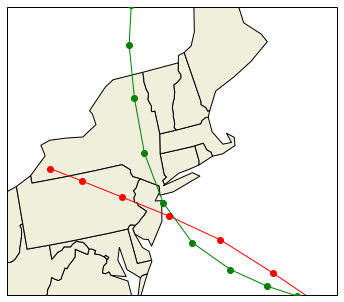

In [16]:
s5845 = np.genfromtxt("./data/storms/LongIsland_5845.storm",skip_header = 3)
s7035 = np.genfromtxt("./data/storms/LongIsland_7035.storm",skip_header = 3)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-80, -66.5, 38, 46], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',
                        category='cultural', name=shapename)
def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    return {'facecolor': facecolor, 'edgecolor': 'black'}
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)

strackspair = [s5845,s7035]
colorspair = ['red','green']
for i in range(2):
    lons = strackspair[i][:,1]-360
    lats = strackspair[i][:,2]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = colorspair[i])
    
    ax.scatter(lons,lats,transform=ccrs.PlateCarree(), color = colorspair[i], zorder = 3)

plt.show()